In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
data=pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [85]:
data['Customer_Segment'].value_counts()    #.unique()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

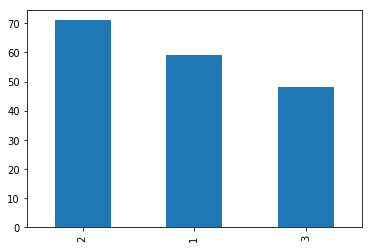

In [86]:
data['Customer_Segment'].value_counts().plot.bar()

In [87]:
data.shape

(178, 14)

In [88]:
X=data.iloc[:,0:13].values
y=data.iloc[:,13].values

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [95]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.33860952, 0.21153835])

In [96]:
X_train

array([[ 2.12849974, -1.01973208],
       [-2.94812519, -0.25480671],
       [ 1.91979542,  1.33701156],
       [-2.13337607, -0.94589715],
       [ 2.23680281, -2.2698391 ],
       [-2.28747076, -0.19935925],
       [-2.97244958, -0.29652264],
       [ 2.61809796, -0.77607001],
       [-1.04705463, -3.49093326],
       [ 2.60981596,  0.07345697],
       [ 0.15229677,  2.31809388],
       [-2.61422416, -2.54812754],
       [-2.50949512, -0.42770866],
       [ 1.72319479,  0.9119946 ],
       [-2.75936377, -0.38668107],
       [-2.82343185, -1.89597038],
       [ 1.36403459,  0.08545164],
       [-2.43383713,  0.11573802],
       [-2.25731631,  0.48629142],
       [ 1.12118381,  2.51095575],
       [-2.30339155,  1.25712557],
       [-2.50110791, -0.53720002],
       [ 0.16381003,  1.29094356],
       [ 2.55406891, -1.06285353],
       [-0.76747938,  3.08596417],
       [ 2.5338645 ,  0.10347674],
       [-0.51186299,  0.6924718 ],
       [ 0.53867836, -0.32318566],
       [ 3.55987441,

In [97]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\NILESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NILESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_pred=classifier.predict(X_test)

In [99]:
print(y_pred[:20])
print(y_test[:20])

[3 1 2 3 2 3 3 1 2 2 1 1 3 2 1 2 3 3 1 3]
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1]


In [100]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0, 16],
       [ 2, 18,  1],
       [ 8,  0,  0]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score as acc
acc(y_test,y_pred)

0.4